In [5]:
# Project Title
## Predicting Climate Disaster Risk in Vietnam Using Historical Rainfall and Temperature Data

In [6]:
# Description
## This project aims by using  machine learning techniques to analyze historical climate data, identify patterns of extreme events, and predict periods of disaster risk to support timely disaster management and mitigation .

In [7]:
# IMPORT AND INSTALLATION

In [8]:
!pip install pandas numpy matplotlib seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier   
from sklearn.metrics import classification_report, confusion_matrix   
from sklearn.preprocessing import StandardScaler       
from sklearn.linear_model import LogisticRegression    


In [10]:
pip install numpy pandas scikit-learn seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
# Loading Data Set 

In [12]:
df = pd.read_csv("vietnamclimate.csv")
print(df.head())

  Month  MinTemperature   MeanTemperature  MaxTemperature  Precipitation  \
0   Jan            15.86            19.77           23.72          33.59   
1   Feb            16.79            20.69           24.63          28.86   
2   Mar            16.74            22.18           27.68          42.81   
3   Apr            21.32            25.38           29.48          67.88   
4   May            23.07            26.96           30.90         176.59   

      Period  Level  
0  1901-1930      1  
1  1901-1930      2  
2  1901-1930      3  
3  1901-1930      4  
4  1901-1930      5  


In [13]:
 # Basic Info 


In [14]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Month            48 non-null     object 
 1   MinTemperature   48 non-null     float64
 2   MeanTemperature  48 non-null     float64
 3   MaxTemperature   48 non-null     float64
 4   Precipitation    48 non-null     float64
 5   Period           48 non-null     object 
 6   Level            48 non-null     int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.8+ KB


Month              0
MinTemperature     0
MeanTemperature    0
MaxTemperature     0
Precipitation      0
Period             0
Level              0
dtype: int64

In [20]:
df.shape

(48, 7)

In [21]:
df.columns

Index(['Month', 'MinTemperature ', 'MeanTemperature', 'MaxTemperature',
       'Precipitation', 'Period', 'Level'],
      dtype='object')

In [25]:
## EDA 

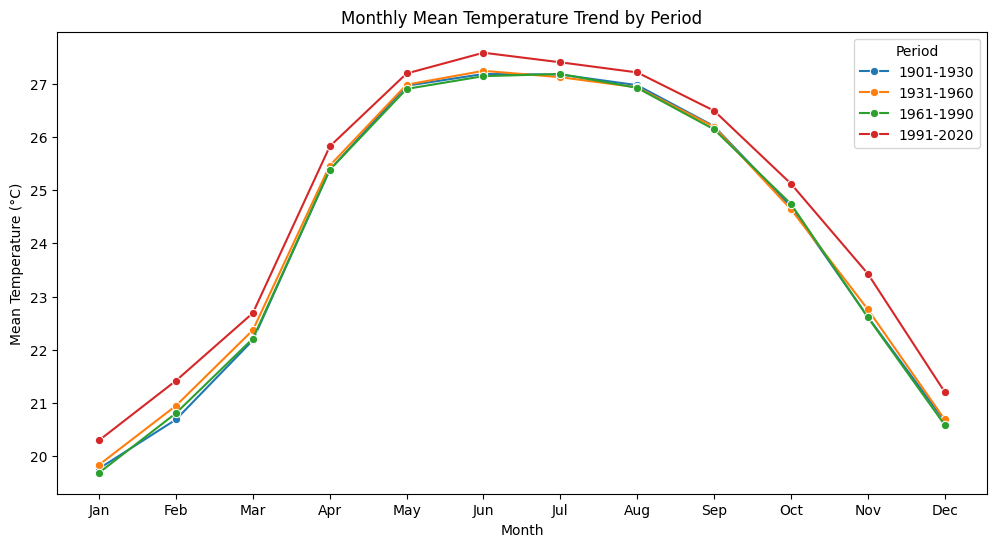

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Month', y='MeanTemperature', hue='Period', marker='o')
plt.title("Monthly Mean Temperature Trend by Period")
plt.xlabel("Month")
plt.ylabel("Mean Temperature (°C)")
plt.show()

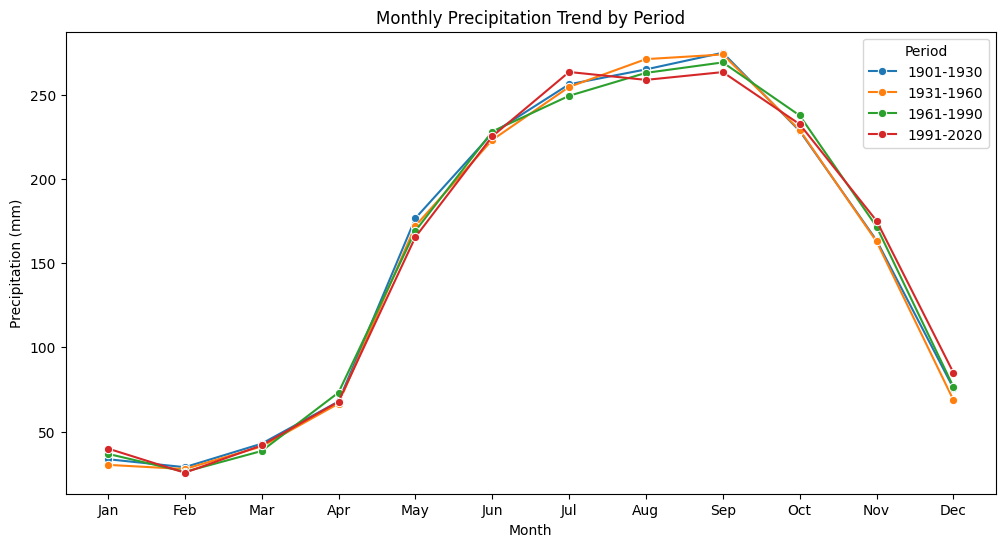

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Month', y='Precipitation', hue='Period', marker='o')
plt.title("Monthly Precipitation Trend by Period")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.show()

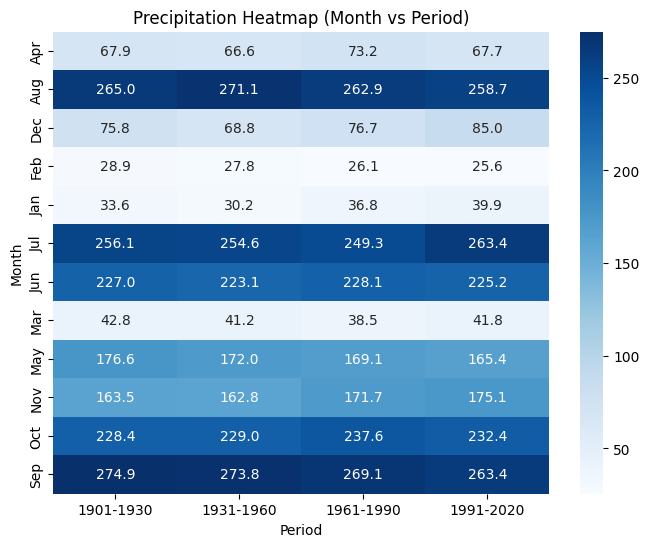

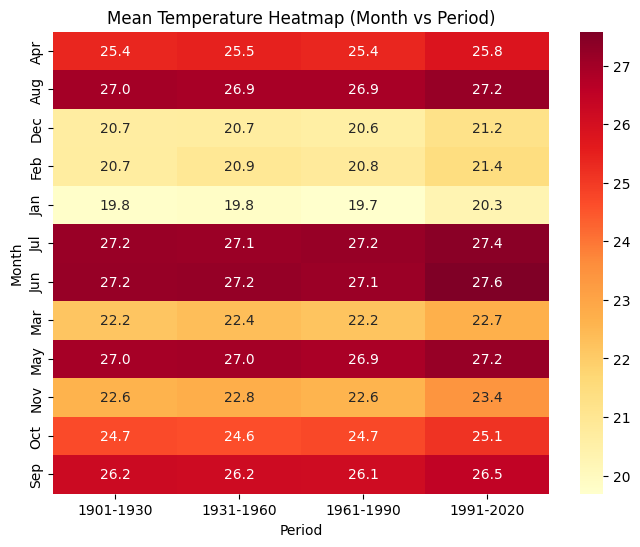

In [28]:
# Precipitation heatmap
precip_pivot = df.pivot(index="Month", columns="Period", values="Precipitation")
plt.figure(figsize=(8,6))
sns.heatmap(precip_pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Precipitation Heatmap (Month vs Period)")
plt.show()

# Mean Temperature heatmap
temp_pivot = df.pivot(index="Month", columns="Period", values="MeanTemperature")
plt.figure(figsize=(8,6))
sns.heatmap(temp_pivot, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title("Mean Temperature Heatmap (Month vs Period)")
plt.show()

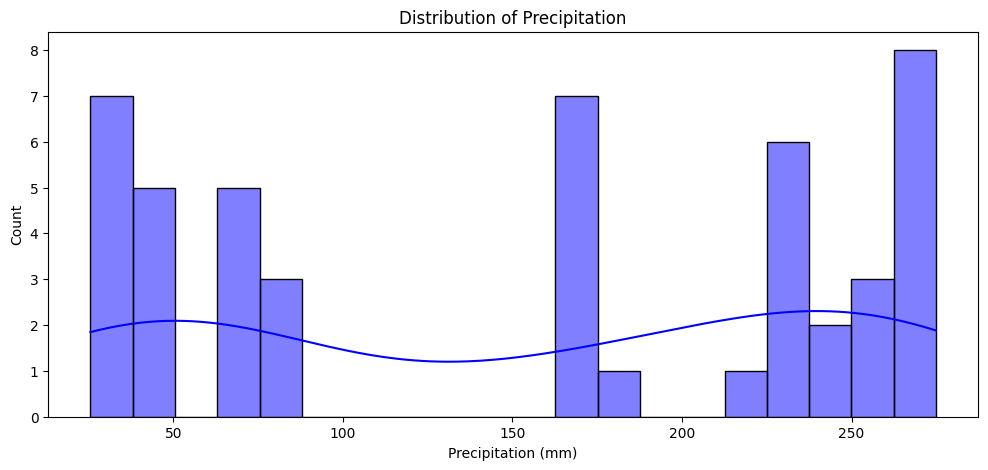

In [53]:
plt.figure(figsize=(12,5))
sns.histplot(df['Precipitation'], kde=True, bins=20, color="blue")
plt.title("Distribution of Precipitation")
plt.xlabel("Precipitation (mm)")
plt.show()

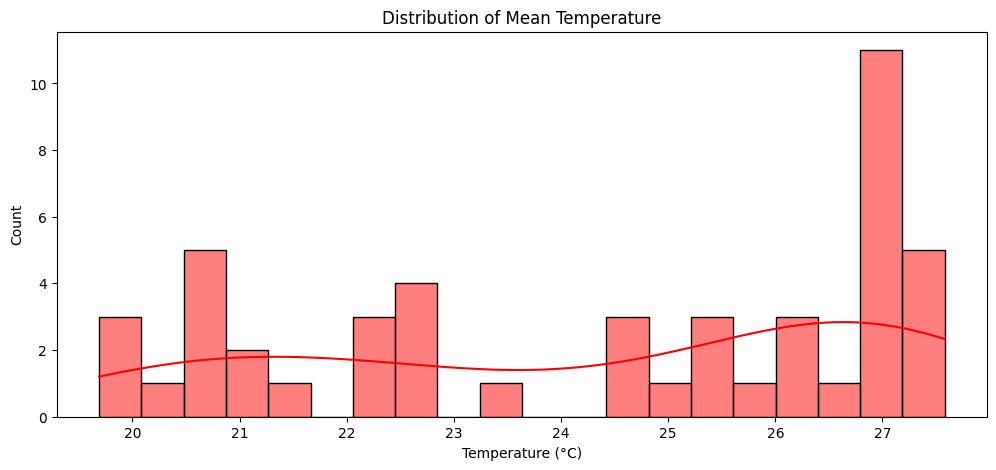

In [54]:
#Mean Temperature
plt.figure(figsize=(12,5))
sns.histplot(df['MeanTemperature'], kde=True, bins=20, color="red")
plt.title("Distribution of Mean Temperature")
plt.xlabel("Temperature (°C)")
plt.show()

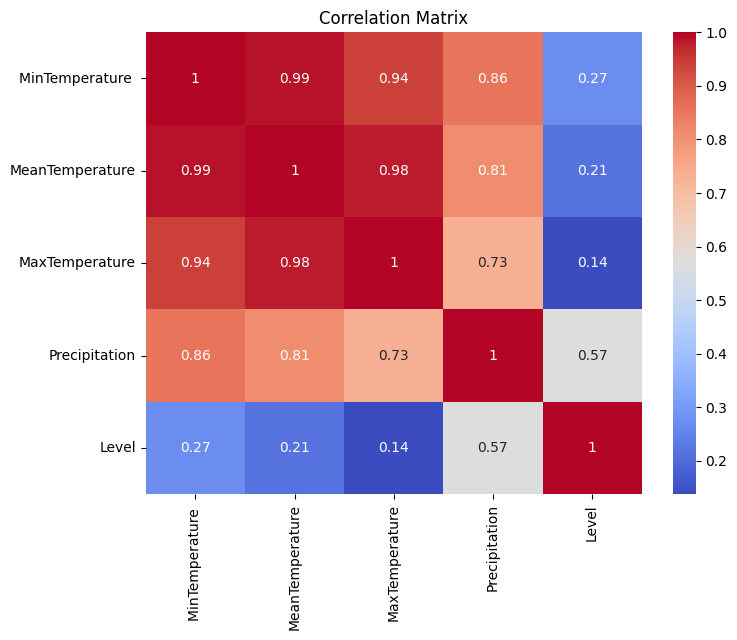

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

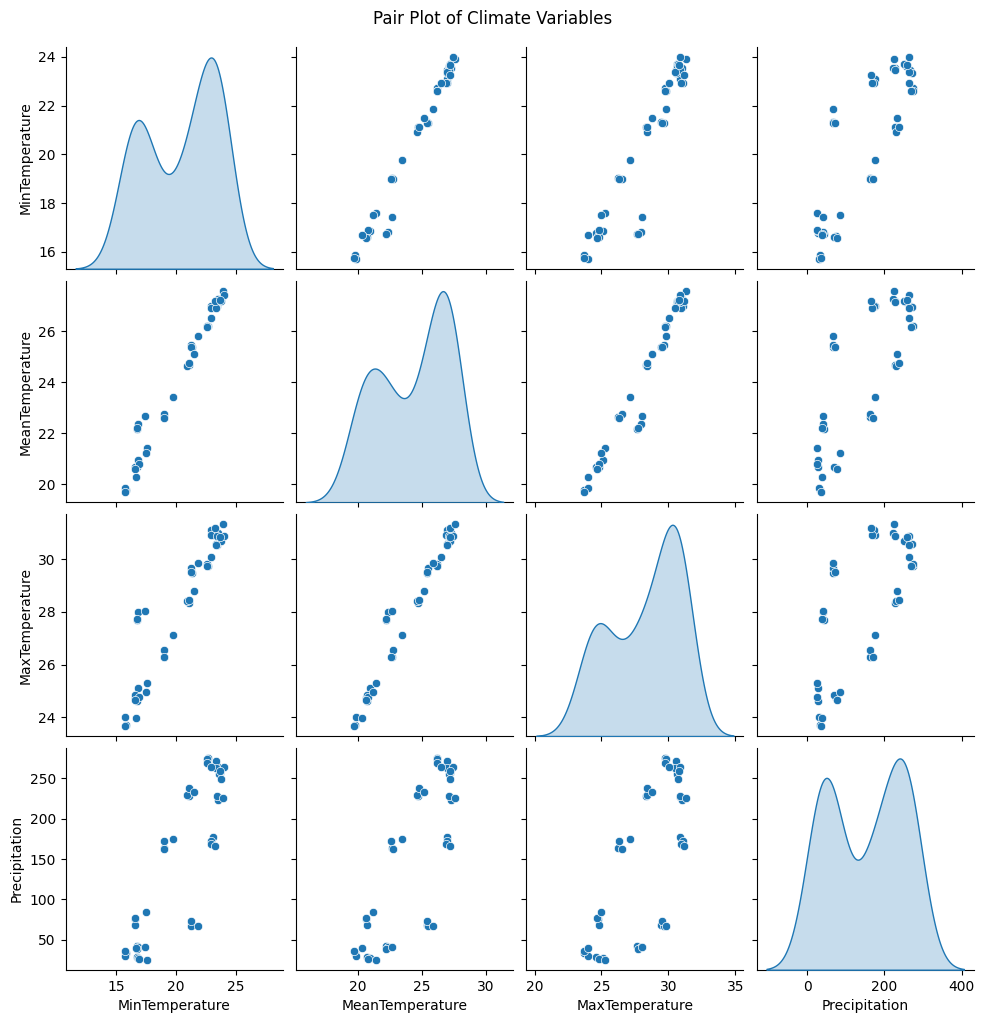

In [35]:
df.columns = df.columns.str.strip()
sns.pairplot(
    df[['MinTemperature', 'MeanTemperature', 'MaxTemperature', 'Precipitation']],
    diag_kind="kde")
plt.suptitle("Pair Plot of Climate Variables", y=1.02)
plt.show()

In [38]:
df.columns

Index(['Month', 'MinTemperature', 'MeanTemperature', 'MaxTemperature',
       'Precipitation', 'Period', 'Level'],
      dtype='object')

In [37]:
#Data Preprocessing

In [40]:
df['Year'] = pd.to_numeric(df['Period'], errors='coerce')
if df['Month'].dtype == 'object':
    df['Month'] = pd.to_datetime(df['Month'], format='%b').dt.month

In [43]:
#Feature 
X = df[['MinTemperature', 'MeanTemperature', 'MaxTemperature', 'Precipitation', 'Month', 'Year']]
y = df['Level']   

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42 )

In [46]:
X_train.shape

(38, 6)

In [48]:
X_test.shape

(10, 6)

In [49]:
#Scale num feature 

In [51]:
num_features = ['MinTemperature', 'MeanTemperature', 'MaxTemperature', 'Precipitation']
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [52]:
 X_train.head()

,MinTemperature,MeanTemperature,MaxTemperature,Precipitation,Month,Year
8,0.751175,0.674145,0.561330,1.232893,9,NaN
3,0.253657,0.353094,0.452989,-1.074394,4,NaN
6,1.109101,1.053924,0.948854,1.023879,7,NaN
39,0.443358,0.525365,0.607166,-1.076067,4,NaN
33,0.174913,0.102518,0.015462,0.817652,10,NaN
